<a href="https://colab.research.google.com/github/ctclumak/Tensorflow-2-and-Keras-Deep-Learning/blob/master/Create_a_Model_and_Deploy_using_FLASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%tensorflow_version 2.x


TensorFlow 2.x selected.


In [0]:
Iris = pd.read_csv("iris.csv")

In [3]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
# Separate features vs target

In [0]:
X = Iris.drop("species", axis = 1)

In [0]:
y = Iris["species"]

In [7]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [0]:
#encoding the features
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [0]:
# train test split and scaler the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [0]:
# Create the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units = 4, activation="relu", input_shape=[4,]))
model.add(Dense(units = 3, activation="softmax")) # we use "softmax" because it is a multi class classification

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [13]:
# train the model

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience = 10)

model.fit(x = scaled_X_train, y = y_train, epochs=200,
          validation_data = (scaled_X_test, y_test), callbacks = [early_stop])

Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 1s 5ms/sample - loss: 1.0875 - accuracy: 0.3500 - val_loss: 1.1791 - val_accuracy: 0.2667
Epoch 2/200
120/120 [==============================] - 0s 145us/sample - loss: 1.0804 - accuracy: 0.3500 - val_loss: 1.1712 - val_accuracy: 0.2667
Epoch 3/200
120/120 [==============================] - 0s 135us/sample - loss: 1.0743 - accuracy: 0.3500 - val_loss: 1.1637 - val_accuracy: 0.2667
Epoch 4/200
120/120 [==============================] - 0s 128us/sample - loss: 1.0685 - accuracy: 0.3500 - val_loss: 1.1565 - val_accuracy: 0.2667
Epoch 5/200
120/120 [==============================] - 0s 135us/sample - loss: 1.0624 - accuracy: 0.3500 - val_loss: 1.1499 - val_accuracy: 0.2667
Epoch 6/200
120/120 [==============================] - 0s 139us/sample - loss: 1.0571 - accuracy: 0.3500 - val_loss: 1.1430 - val_accuracy: 0.2667
Epoch 7/200
120/120 [==============================] - 0s 151us/sample - lo

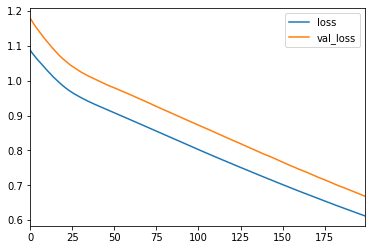

In [14]:
#check the performance

metrics = pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot()


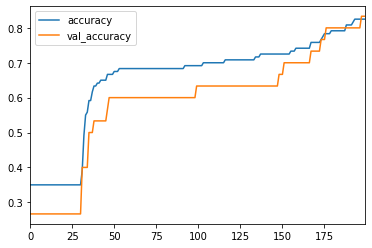

In [15]:
#check the accuracy metrics
metrics[['accuracy', 'val_accuracy']].plot()

In [16]:
model.evaluate(scaled_X_test,y_test, verbose = 0)

[0.6688003540039062, 0.8333333]

In [0]:
# if we think the accuracy is good enough, it is 93% here we can just fit_transform all the X data
 epochs = len(metrics)


In [18]:
epochs

200

In [0]:
scaled_X = scaler.fit_transform(X)

In [0]:
#create a new model

model = Sequential()
model.add(Dense(units = 4, activation="relu", input_shape=[4,]))
model.add(Dense(units = 3, activation="softmax")) # we use "softmax" because it is a multi class classification

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [0]:
# fit the scaled_X to the model

model.fit(scaled_X,y,epochs = epochs)

In [0]:
# save the model
model.save("final_iris_models.h5")


In [0]:
# save the scaler
import joblib

In [24]:
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

In [0]:
# predict on a new file

## load the model and scaler first
from tensorflow.keras.models import load_model
flower_model = load_model("final_iris_models.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

In [26]:
Iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [0]:
flower_example = {"sepal_length": 5.1,
                  "sepal_width": 3.5,
                  "petal_length": 1.4,
                  "petal_width": 0.2,
                    }

In [28]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
def return_prediction(model,scaler, sample_json):
  s_len = sample_json["sepal_length"]
  s_wid = sample_json["sepal_width"]
  p_len = sample_json["petal_length"]
  p_wid = sample_json["petal_width"]

  flower = [[s_len,s_wid,p_len, p_wid]]

  classes = np.array(['setosa', 'versicolor', 'virginica'])

  flower = scaler.transform(flower)

  class_ind = model.predict_classes(flower)

  return classes[class_ind]

In [30]:
return_prediction(flower_model, flower_scaler, flower_example)

array(['setosa'], dtype='<U10')

**CODE FOR DEPLOYMENT**

In [0]:
from tensorflow.keras.models import load_model
import numpy as np
import joblib

flower_model = load_model("final_iris_models.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

def return_prediction(model,scaler, sample_json):
  s_len = sample_json["sepal_length"]
  s_wid = sample_json["sepal_width"]
  p_len = sample_json["petal_length"]
  p_wid = sample_json["petal_width"]

  flower = [[s_len,s_wid,p_len, p_wid]]
  classes = np.array(['setosa', 'versicolor', 'virginica'])

  flower = scaler.transform(flower)

  class_ind = model.predict_classes(flower)

  return classes[class_ind]